# The Keto Diet Project: Minimally Viable Product (MVP)

#### Can we predict if a food is "Keto Friendly" based solely on it's macro percentages from a nutritional facts database?

## What is Keto?
### A Ketogenic Diet primarily consists of high-fats, moderate-proteins, and very-low-carbohydrates. 

### Known Keto-Friendly Foods/Drinks: 
- Meat
- Fish and seafood
- Eggs
- Natural fat/high-fat sauces
- Vegetables that grow above ground
- High-fat dairy
- Nuts
- Berries
- Coffee
- Tea
- Bone broth

### Foods to Avoid on Keto:
- Fruit
- Potatoes
- Pasta
- Rice
- Beer 
- Bread
- Sodas
- Candy

### The typical macro ratio for keto looks like the following (specifically for a 2,000 kcal per day diet): 

- <b>Fat:</b> 55% - 60% of total calories (165 g per day)
- <b>Protein:</b> 30% - 35% of total calories (75 g per day)
- <b>Carbs:</b> 5% - 10% of total calories (40 g per day)

## Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Additional Sklearn Imports 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.metrics import f1_score

# Acquire and Prepare Files
import acquire 
import prepare

# Warnings 
import warnings
warnings.filterwarnings("ignore")

## Acquire

- Acquire data

In [2]:
# Acquired data
df = pd.read_csv("nutrition.csv")
df.head()

,number,food_item,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72.0,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2.0,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
# Total dataframe shape (8.7k different food items)
df.shape

(8789, 77)

In [4]:
# Nutrition data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number                       8789 non-null   int64  
 1   food_item                    8789 non-null   object 
 2   serving_size                 8789 non-null   object 
 3   calories                     8789 non-null   int64  
 4   total_fat                    8789 non-null   float64
 5   saturated_fat                7199 non-null   object 
 6   cholesterol                  8789 non-null   object 
 7   sodium                       8789 non-null   object 
 8   choline                      8789 non-null   object 
 9   folate                       8789 non-null   object 
 10  folic_acid                   8789 non-null   object 
 11  niacin                       8789 non-null   object 
 12  pantothenic_acid             8789 non-null   object 
 13  riboflavin        

In [5]:
# Write a function to add to acquire.py file

## Prepare

- Prepare and clean data

In [6]:
# Check for missing/null values 
print(df.isnull().sum())

number          0
food_item       0
serving_size    0
calories        0
total_fat       0
               ..
alcohol         0
ash             0
caffeine        0
theobromine     0
water           0
Length: 77, dtype: int64


In [7]:
# Dropping columns 

In [8]:
df = df.drop(['number', 'saturated_fat','cholesterol','sodium','choline','folate','folic_acid','niacin','pantothenic_acid',
         'riboflavin','thiamin','vitamin_a','vitamin_a_rae','carotene_alpha','carotene_beta','cryptoxanthin_beta',
         'lutein_zeaxanthin','lucopene','vitamin_b12','vitamin_b6','vitamin_c','vitamin_d','vitamin_e','tocopherol_alpha',
        'vitamin_k','calcium','copper', 'iron','magnesium','manganese','phosphorous','potassium','selenium','zinc',
        'alanine','arginine','aspartic_acid','cystine','glutamic_acid','glycine','histidine','hydroxyproline','isoleucine',
        'leucine','lysine','methionine','phenylalanine','proline','serine','threonine','tryptophan','tyrosine','valine',
        'fiber', 'sugars','fructose','galactose','glucose','lactose','maltose','sucrose','fat','saturated_fatty_acids',
        'monounsaturated_fatty_acids','polyunsaturated_fatty_acids','fatty_acids_total_trans','alcohol','ash','caffeine',
        'theobromine','water'], axis = 1)
df.head()

,food_item,serving_size,calories,total_fat,protein,carbohydrate
0,Cornstarch,100 g,381,0.1,0.26,91.27
1,"Nuts, pecans",100 g,691,72.0,9.17,13.86
2,"Eggplant, raw",100 g,25,0.2,0.98,5.88
3,"Teff, uncooked",100 g,367,2.4,13.30,73.13
4,"Sherbet, orange",100 g,144,2.0,1.10,30.40


In [9]:
# Want to note here that total_fat, protein, and carbohydrates are all in grams

In [10]:
# Entire database has the serving size as 100g to provide a comparison with one less variable. 
# Will drop this column for now. 
df = df.drop(['serving_size'], axis = 1)
df.head()

,food_item,calories,total_fat,protein,carbohydrate
0,Cornstarch,381,0.1,0.26,91.27
1,"Nuts, pecans",691,72.0,9.17,13.86
2,"Eggplant, raw",25,0.2,0.98,5.88
3,"Teff, uncooked",367,2.4,13.30,73.13
4,"Sherbet, orange",144,2.0,1.10,30.40


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,8789.0,226.283878,169.862001,0.0,91.00,191.00,337.00,902.00
total_fat,8789.0,10.556855,15.818247,0.0,1.00,5.10,14.00,100.00
protein,8789.0,11.345616,10.530602,0.0,2.38,8.02,19.88,88.32
carbohydrate,8789.0,22.121915,27.266261,0.0,0.05,9.34,34.91,100.00


Takeaways:
- No missing values
- Carbohydrates have highest mean, std, and 50% and 75% numbers compared to other macros
- That's why keto is so difficult because carbs are everywhere
- Average calories for this food list is 226

### Visualize

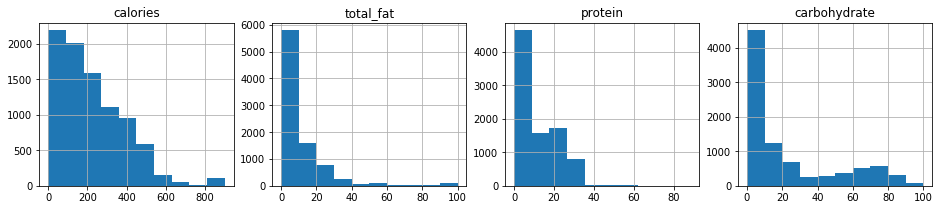

In [22]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(16, 3))
for i, col in enumerate(['calories', 'total_fat', 'protein', 'carbohydrate']):  
    plot_number = i + 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist()

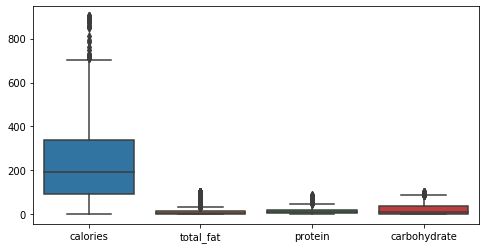

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['food_item']))

In [ ]:
# Write a function to add to prepare.py file

def wrangle_nutrition():
    df = pd.read_csv("nutrition.csv")
    df.drop(columns='student_id', inplace=True)
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

### Train, Validate, Test

In [24]:
# Train, Validate, Test
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate, random_state=123)

## Explore 

### Macro Comparisons

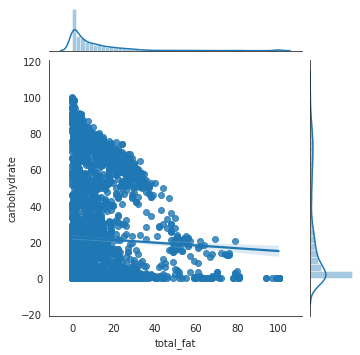

In [26]:
# Looking for foods that have high fat and low carbs
with sns.axes_style('white'):
    j = sns.jointplot("total_fat", "carbohydrate", data=train, kind='reg', height=5);
plt.show()

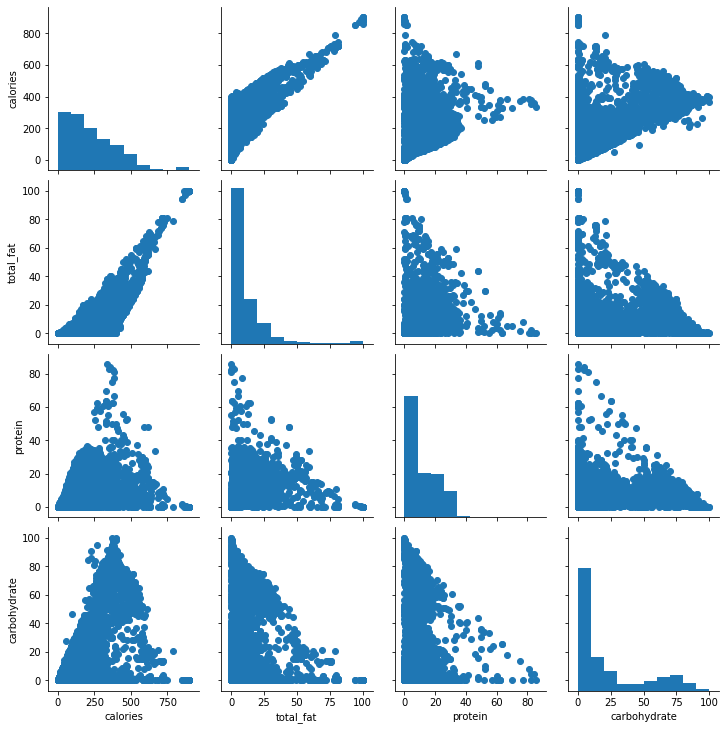

In [27]:
# Compare all with pairgrid
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

(0, 4)

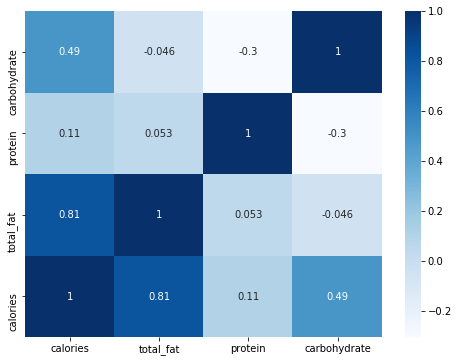

In [28]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.ylim(0, 4)

(0, 175)

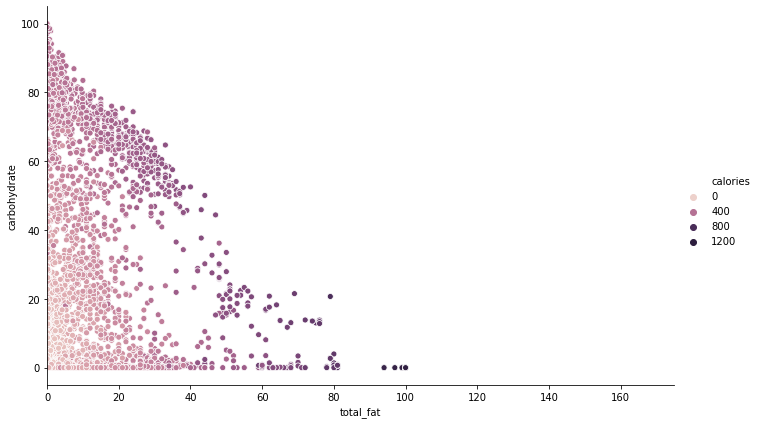

In [31]:
sns.relplot(x="total_fat", y="carbohydrate", hue="calories", data=train, height=6, aspect=1.6)
plt.xlim(0, 175)

In [ ]:
# What are the macro percentages for a food to be considered "keto friendly"?

In [ ]:
# Low Carb Foods

In [ ]:
# High Fat Foods

In [ ]:
# High Protein Foods

In [ ]:
# Food Comparisons 

### Feature Engineering

### Hypothesis Testing

## Model 

### Baseline 

In [30]:
# Baseline (if food is ## < on carbs and ## > on fat) that could be baseline..
df['yhat_baseline'] = df['total_fat'].mean()
df.head(3)

,food_item,calories,total_fat,protein,carbohydrate,yhat_baseline
0,Cornstarch,381,0.1,0.26,91.27,10.556855
1,"Nuts, pecans",691,72.0,9.17,13.86,10.556855
2,"Eggplant, raw",25,0.2,0.98,5.88,10.556855


### Logistic Regression

### Decision Tree

### Random Forest

### KNN

## Conclusions/Takeaways

- What was best model?
- How did the findings compare with what is known?

## Future Investigations

- Can other food items be classified under certain diets (vegan, vegetarian, low-carb, etc) using similar methods?  


- Could this system be used on an food tracking app to give users suggestions on what food they should be buying depending on what diet they are on? This could take out a lot of the guessing and research that comes with being on a diet and really simplify things for the user.

## Resources:

- https://www.ncbi.nlm.nih.gov/books/NBK499830/
- https://www.hsph.harvard.edu/nutritionsource/healthy-weight/diet-reviews/ketogenic-diet/
- https://www.dietdoctor.com/low-carb/keto/foods